<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:

missing_summary = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values:\n", missing_summary)

total_rows = len(df)
missing_percentage = (missing_summary / total_rows) * 100
print("\nMissing percentage:\n", missing_percentage)

df = df.dropna(subset=['Employment'])

job_sat_mode = df['JobSat'].mode()[0]
df['JobSat'] = df['JobSat'].fillna(job_sat_mode)

remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)

print("\nMissing values after cleaning:\n", df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

print(df['JobSat'].value_counts())
print(df['RemoteWork'].value_counts())


Missing values:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing percentage:
 Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64

Missing values after cleaning:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64
JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64
RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_964/1538039230.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_clean.groupby('ExperienceRange')['JobSatCode'].median()


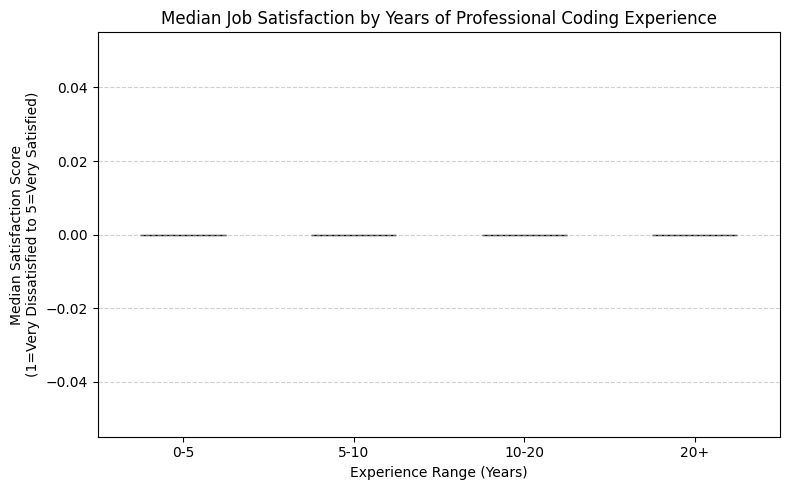

In [4]:
# Step 1: Convert 'YearsCodePro' to numeric values
def convert_experience(val):
    if pd.isnull(val):
        return None
    if val == "Less than 1 year":
        return 0.5
    if val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Convert 'JobSat' to an ordered categorical type
satisfaction_order = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df['JobSat'] = pd.Categorical(df['JobSat'], categories=satisfaction_order, ordered=True)

df_clean = df.dropna(subset=['YearsCodePro', 'JobSat'])

df_clean['JobSatCode'] = df_clean['JobSat'].cat.codes + 1  # 1 to 5

bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=False)

median_satisfaction = df_clean.groupby('ExperienceRange')['JobSatCode'].median()

plt.figure(figsize=(8, 5))
median_satisfaction.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.ylabel('Median Satisfaction Score\n(1=Very Dissatisfied to 5=Very Satisfied)')
plt.xlabel('Experience Range (Years)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


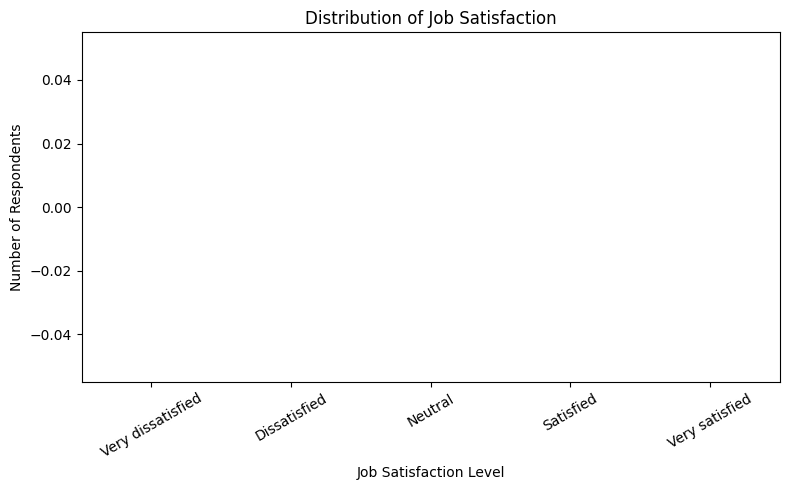

In [5]:
if 'JobSat' in df.columns:
    df_job_sat = df['JobSat'].dropna()

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='JobSat', order=[
        'Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied'
    ])

    plt.title('Distribution of Job Satisfaction')
    plt.xlabel('Job Satisfaction Level')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'JobSat' was not found in the dataset.")

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_964/2567182598.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')


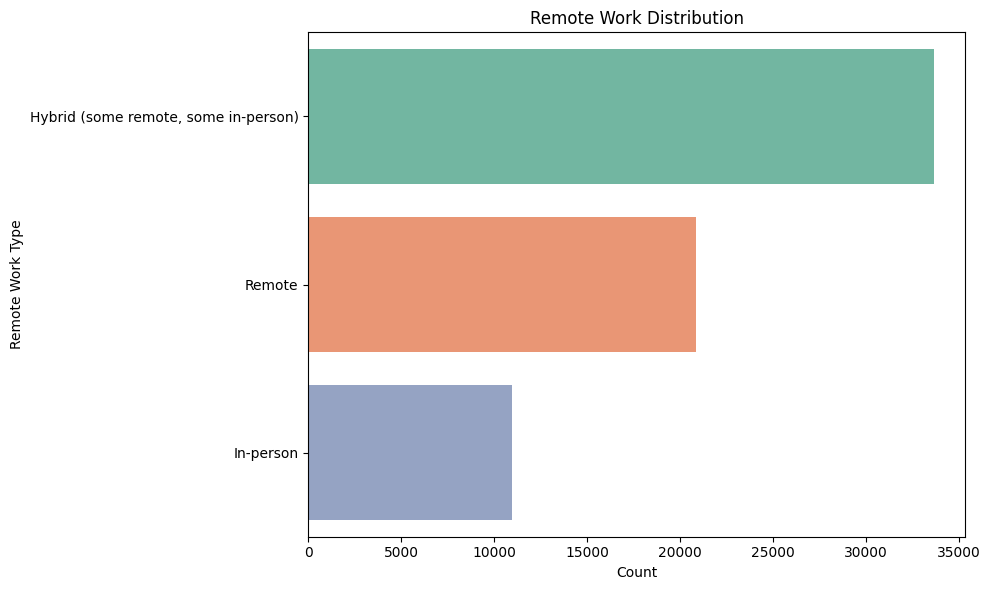

Remote Work Preferences by Employment Type (%):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 44.3   
Employed, full-time;Employed, part-time                                             40.1   
Employed, full-time;Independent contractor, fre...                                  37.4   
Employed, full-time;Independent contractor, fre...                                  43.5   
Employed, full-time;Independent contractor, fre...                                   0.0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                  57.1   
Student, full-time;Student, part-time;Retired                                      100.0   
Student, part-time              

In [6]:
df['DevType'] = df['DevType'].fillna('Unknown')
df['Employment'] = df['Employment'].fillna('Unknown')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')
plt.title('Remote Work Distribution')
plt.xlabel('Count')
plt.ylabel('Remote Work Type')
plt.tight_layout()
plt.show()

employment_remote_ct = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print("Remote Work Preferences by Employment Type (%):")
print(employment_remote_ct.round(1))

df['DevType_split'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType_split')
df_exploded['DevType_split'] = df_exploded['DevType_split'].str.strip()

role_remote_ct = pd.crosstab(df_exploded['DevType_split'], df_exploded['RemoteWork'], normalize='index') * 100
print("\nRemote Work Preferences by Job Role (%):")
print(role_remote_ct.round(1).sort_values(by='Remote', ascending=False))

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


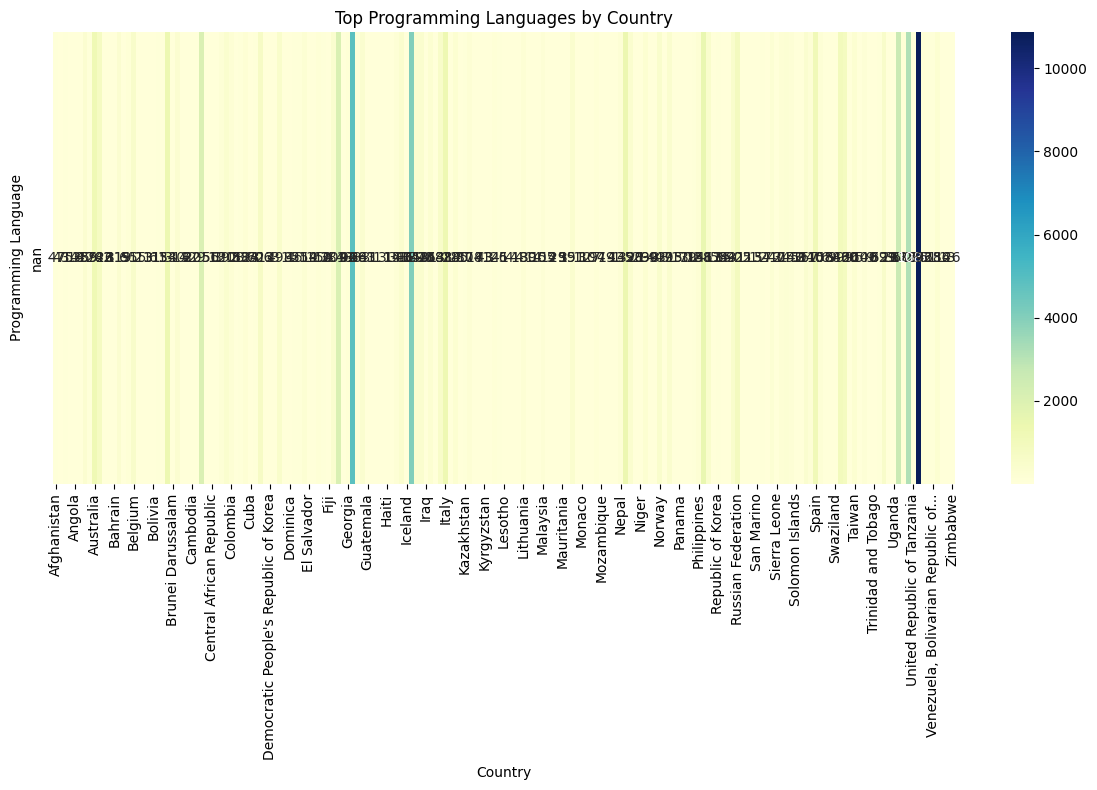

In [14]:
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype(str)

df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()

language_counts = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

language_pivot = language_counts.pivot_table(index='LanguageHaveWorkedWith', columns='Country', values='Count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(language_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


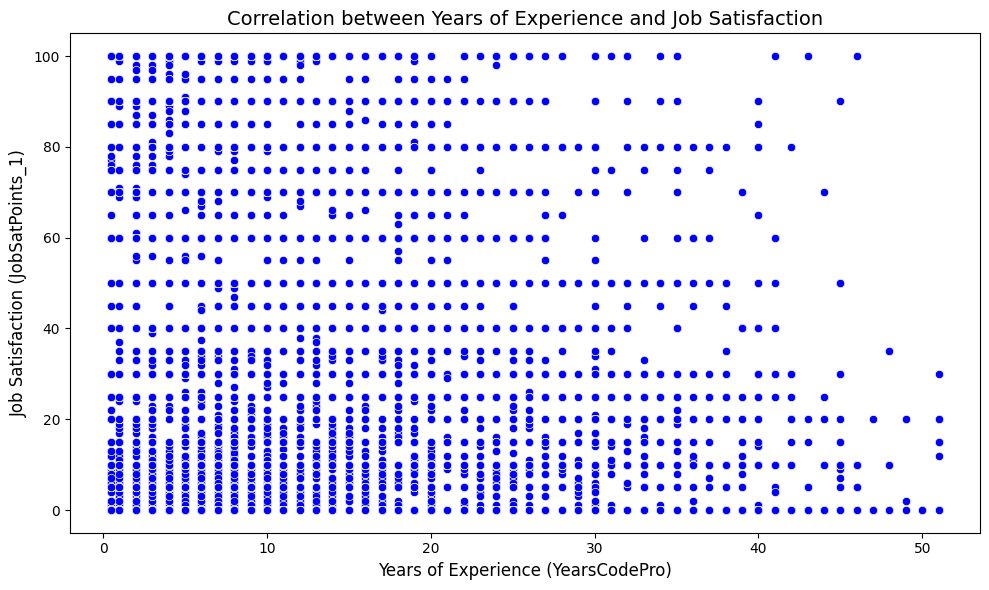

In [15]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_clean, color='blue')

plt.title('Correlation between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Experience (YearsCodePro)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_1)', fontsize=12)

plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [9]:
## Write your code here

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [10]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
